<a href="https://colab.research.google.com/github/ZackMcz/Challenge-2---Telecom-X/blob/main/TelecomX_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [1]:
import pandas as pd
dados_telecom = pd.read_json('/content/TelecomX_Data.json')
dados_telecom


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [2]:
# Normaliza as colunas aninhadas
df_customer = pd.json_normalize(dados_telecom['customer'])
df_phone = pd.json_normalize(dados_telecom['phone'])
df_internet = pd.json_normalize(dados_telecom['internet'])
df_account = pd.json_normalize(dados_telecom['account'])

# Concatena os dataframes normalizados com o dataframe original, excluindo as colunas aninhadas originais
df_telecom_normalized = pd.concat([dados_telecom[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

# Exibe as primeiras linhas do dataframe normalizado
display(df_telecom_normalized.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
# Exibe as linhas do dataframe normalizado
df_telecom_normalized


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
inconsistencias = {} # Inicializa o dicionário para armazenar

In [5]:
inconsistencias

for col in df_telecom_normalized.select_dtypes(include='object').columns:
    valores_unicos = df_telecom_normalized[col].unique()
    # Verifica se os valores exclusivos No são um subconjunto de {'Yes', 'No'}
    if not set(valores_unicos).issubset({'Yes', 'No'}):
        inconsistencias[col] = valores_unicos

# Lista as inconsistências idedntificadas
display(inconsistencias)

{'customerID': array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 'Churn': array(['No', 'Yes', ''], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['Yes', 'No', 'No internet service'], dtype=object),
 'StreamingTV': array(['Yes', 'No', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['One year', 'Month-to-month', 'Two year'], dtype=object),
 'PaymentMethod': array(['Mailed check', 'Electronic check', 'Credit card (au

In [6]:
df_telecom_normalized

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
display(dados_telecom.isnull().sum())

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [8]:
import pandas as pd

# Obtêm as colunas do objeto
object_columns = df_telecom_normalized.select_dtypes(include='object').columns

# Exibe valores exclusivos para cada coluna do objeto
for col in object_columns:
    print(f"Unique values for column '{col}':")
    display(pd.unique(df_telecom_normalized[col]))


Unique values for column 'customerID':


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

Unique values for column 'Churn':


array(['No', 'Yes', ''], dtype=object)

Unique values for column 'gender':


array(['Female', 'Male'], dtype=object)

Unique values for column 'Partner':


array(['Yes', 'No'], dtype=object)

Unique values for column 'Dependents':


array(['Yes', 'No'], dtype=object)

Unique values for column 'PhoneService':


array(['Yes', 'No'], dtype=object)

Unique values for column 'MultipleLines':


array(['No', 'Yes', 'No phone service'], dtype=object)

Unique values for column 'InternetService':


array(['DSL', 'Fiber optic', 'No'], dtype=object)

Unique values for column 'OnlineSecurity':


array(['No', 'Yes', 'No internet service'], dtype=object)

Unique values for column 'OnlineBackup':


array(['Yes', 'No', 'No internet service'], dtype=object)

Unique values for column 'DeviceProtection':


array(['No', 'Yes', 'No internet service'], dtype=object)

Unique values for column 'TechSupport':


array(['Yes', 'No', 'No internet service'], dtype=object)

Unique values for column 'StreamingTV':


array(['Yes', 'No', 'No internet service'], dtype=object)

Unique values for column 'StreamingMovies':


array(['No', 'Yes', 'No internet service'], dtype=object)

Unique values for column 'Contract':


array(['One year', 'Month-to-month', 'Two year'], dtype=object)

Unique values for column 'PaperlessBilling':


array(['Yes', 'No'], dtype=object)

Unique values for column 'PaymentMethod':


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

Unique values for column 'Charges.Total':


array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [9]:
display(df_telecom_normalized.isnull().sum())

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [10]:
display(df_telecom_normalized['Charges.Total'].unique())

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [11]:
# Salva os dados limpos para um arquivo csv
df_telecom_normalized.to_csv('/content/telecom_data_cleaned.csv', index=False)

print("Arquivos salvos para /content/telecom_data_cleaned.csv")


Arquivos salvos para /content/telecom_data_cleaned.csv


In [12]:
# Carrega os dados limpos

# Começa carregando arquivo CSV limpo (`/content/telecom_data_cleaned.csv`) de volta para um DataFrame.

df_telecom_cleaned = pd.read_csv('/content/telecom_data_cleaned.csv')
display(df_telecom_cleaned.head())


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
## Verificar tipos de dados

### Confirmar os tipos de dados de todas as colunas para ter certeza de que estão como esperado após as limpezas anteriores.

df_telecom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
##Converte colunas categóricas

# Transformar as colunas com tipo de dado 'object' em um formato numérico usando técnicas de codificação como One-Hot Encoding . Isso cria novas colunas binárias para cada categoria única.

# Identifica colunas de objetos excluindo 'Churn'

object_cols = df_telecom_cleaned.select_dtypes(include='object').columns.tolist()
object_cols.remove('customerID') # Remove customerID as it's an identifier
object_cols.remove('Churn')

# Aplica codificação One-Hot
df_encoded = pd.get_dummies(df_telecom_cleaned, columns=object_cols, dummy_na=False)

# Manipula a coluna 'Churn'
# Verifica os valores únicos primeiro
print("Unique values in Churn column before mapping:")
display(df_encoded['Churn'].unique())


# Mapeia 'Yes' para 1 e 'No' para 0 e manipule strings vazias ou outros valores se existirem
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0, '': 0}).fillna(0).astype(int)

# Mapeia '' para 0 e preencher quaisquer NaNs resultantes com 0

# Exibe as primeiras linhas e informações do DataFrame transformado
display(df_encoded.head())
df_encoded.info()



Unique values in Churn column before mapping:


array(['No', 'Yes', nan], dtype=object)

,customerID,Churn,SeniorCitizen,tenure,Charges.Monthly,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,0002-ORFBO,0,0,9,65.6,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0003-MKNFE,0,0,9,59.9,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0004-TLHLJ,1,0,4,73.9,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0011-IGKFF,1,1,13,98.0,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,0013-EXCHZ,1,1,3,83.9,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Columns: 6577 entries, customerID to Charges.Total_999.9
dtypes: bool(6572), float64(1), int64(3), object(1)
memory usage: 45.8+ MB


In [15]:
# Identifica colunas numéricas e categóricas para modelagem

# Separa as colunas que serão usadas como features (variáveis de entrada) para o modelo e a coluna alvo (`Churn`).

features = [col for col in df_encoded.columns if col not in ['customerID', 'Churn']]
target = 'Churn'

X = df_encoded[features]
y = df_encoded[target]

display(X.head())
display(y.head())



,SeniorCitizen,tenure,Charges.Monthly,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,0,9,65.6,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


,Churn
0,0
1,0
2,1
3,1
4,1


In [16]:
# Escala colunas numéricas ( a título opcional)

# Aplicar escalonamento em colunas numéricas para normalizar suas faixas de valores, o que pode melhorar o desempenho de alguns algoritmos de machine learning.

# Identify numeric columns in X
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Display the first few rows of the scaled X
display(X.head())


/tmp/ipython-input-865328932.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


,SeniorCitizen,tenure,Charges.Monthly,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,-0.440736,-0.950200,0.029206,True,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.440736,-0.950200,-0.159990,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.440736,-1.153700,0.304702,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.268932,-0.787401,1.104635,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.268932,-1.194400,0.636624,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Carrega os dados limpos (Passo 1 do plano)
# Começa carregando arquivo CSV limpo (`/content/telecom_data_cleaned.csv`) de volta para um DataFrame.

df_telecom_cleaned = pd.read_csv('/content/telecom_data_cleaned.csv')
display(df_telecom_cleaned.head())

# Cria a coluna de valor diário
# Divide o faturamento mensal por um número aproximado de dias em um mês (por exemplo, 30)
df_telecom_cleaned['Charges.Daily'] = df_telecom_cleaned['Charges.Monthly'] / 30

# Exibe as primeiras linhas com a nova coluna para verificar
display(df_telecom_cleaned[['Charges.Monthly', 'Charges.Daily']].head())


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


,Charges.Monthly,Charges.Daily
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [18]:
import numpy as np

# Converte a coluna 'Churn' em 1s e 0s, manipulando potenciais valores ausentes se eles forem salvos como strings vazias
df_telecom_cleaned['Churn'] = df_telecom_cleaned['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
df_telecom_cleaned['Churn'] = pd.to_numeric(df_telecom_cleaned['Churn'], errors='coerce')


# Converte outras colunas de objetos binários em 1s e 0s
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_telecom_cleaned[col] = df_telecom_cleaned[col].replace({'Yes': 1, 'No': 0})

# Identifica colunas de objetos com mais de dois valores exclusivos para codificação One-Ho
object_cols_for_ohe = []
for col in df_telecom_cleaned.select_dtypes(include='object').columns:
    if col not in ['customerID', 'Churn'] and df_telecom_cleaned[col].nunique() > 2:
        object_cols_for_ohe.append(col)

# Aplica codificação One-Hot
df_processed = pd.get_dummies(df_telecom_cleaned, columns=object_cols_for_ohe, dummy_na=False)

# Exibe as primeiras linhas e informações do DataFram transformado
display(df_processed.head())
df_processed.info()


/tmp/ipython-input-3948090841.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_cleaned['Churn'] = df_telecom_cleaned['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
/tmp/ipython-input-3948090841.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom_cleaned[col] = df_telecom_cleaned[col].replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,0002-ORFBO,0.0,Female,0,1,1,9,1,1,65.6,...,False,False,False,False,False,False,False,False,False,False
1,0003-MKNFE,0.0,Male,0,0,0,9,1,0,59.9,...,False,False,False,False,False,False,False,False,False,False
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,False,False
3,0011-IGKFF,1.0,Male,1,1,0,13,1,1,98.0,...,False,False,False,False,False,False,False,False,False,False
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,1,83.9,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Columns: 6573 entries, customerID to Charges.Total_999.9
dtypes: bool(6562), float64(3), int64(6), object(2)
memory usage: 46.1+ MB


In [19]:
# Identifica recursos (todas as colunas, exceto 'customerID' e 'Churn') e meta ('Churn')
features = [col for col in df_processed.columns if col not in ['customerID', 'Churn']]
target = 'Churn'

X = df_processed[features]
y = df_processed[target]

# Exibe as primeiras linhas dos recursos (X) e do alvo (y) para verificar
display(X.head())
display(y.head())



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Daily,MultipleLines_No,...,Charges.Total_995.35,Charges.Total_996.45,Charges.Total_996.85,Charges.Total_996.95,Charges.Total_997.65,Charges.Total_997.75,Charges.Total_998.1,Charges.Total_999.45,Charges.Total_999.8,Charges.Total_999.9
0,Female,0,1,1,9,1,1,65.6,2.186667,True,...,False,False,False,False,False,False,False,False,False,False
1,Male,0,0,0,9,1,0,59.9,1.996667,False,...,False,False,False,False,False,False,False,False,False,False
2,Male,0,0,0,4,1,1,73.9,2.463333,True,...,False,False,False,False,False,False,False,False,False,False
3,Male,1,1,0,13,1,1,98.0,3.266667,True,...,False,False,False,False,False,False,False,False,False,False
4,Female,1,1,0,3,1,1,83.9,2.796667,True,...,False,False,False,False,False,False,False,False,False,False


,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [20]:
# Remove linhas com valores ausentes na coluna 'Churn'
df_processed.dropna(subset=['Churn'], inplace=True)

# Verifica a contagem da coluna 'Churn' após a remoção
display(df_processed['Churn'].count())

np.int64(7043)

In [21]:
# Salva o DataFrame processado em um arquivo CSV
df_processed.to_csv('/content/telecom_data_processed.csv', index=False)

print("Dados processados salvos para  /content/telecom_data_processed.csv")


Dados processados salvos para  /content/telecom_data_processed.csv


#📊 Carga e análise

In [22]:
# Executa análise descritiva no DataFrame processado
display(df_processed.describe())


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


In [23]:
# Realiza análise descritiva no DataFrame processado
display(df_processed.describe())

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,3.958333


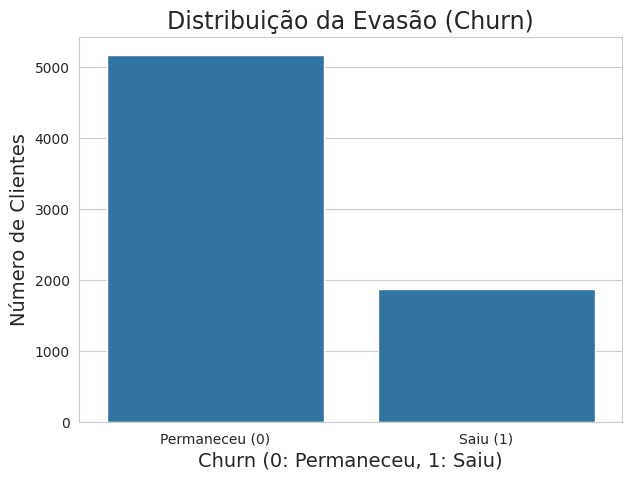

In [28]:
# Distribuição da Evasão

import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot of the 'Churn' column
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df_processed)
plt.title('Distribuição da Evasão (Churn)' , fontsize=17)
plt.xlabel('Churn (0: Permaneceu, 1: Saiu)' , fontsize=14)
plt.ylabel('Número de Clientes' , fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Permaneceu (0)', 'Saiu (1)']) # Add labels for clarity
plt.show()

/tmp/ipython-input-4222583685.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_processed, palette='viridis')


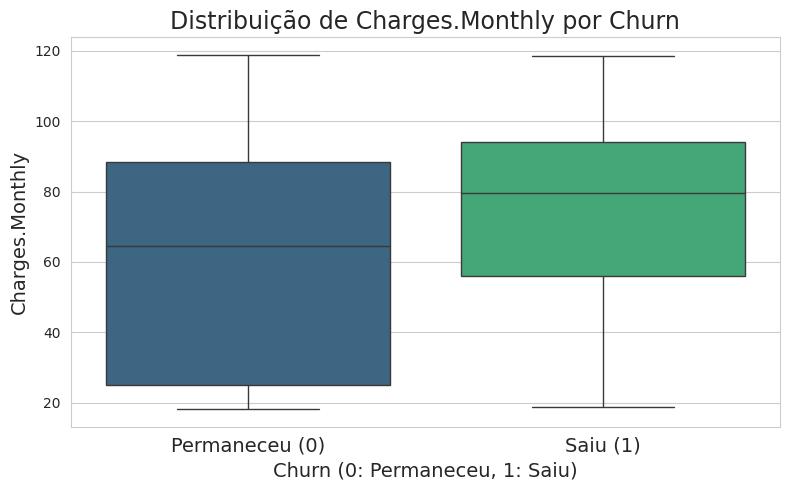

/tmp/ipython-input-4222583685.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_processed, palette='viridis')


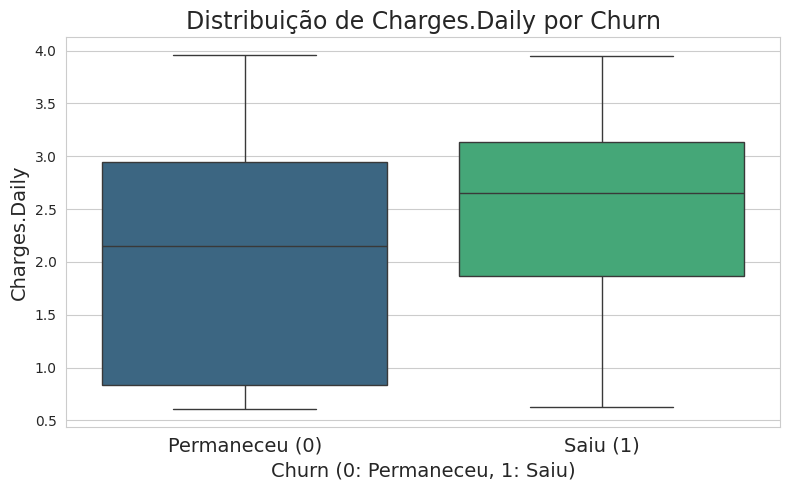

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create box plots for numerical variables vs. Churn
numerical_cols_to_plot = ['Charges.Monthly', 'Charges.Daily']

for col in numerical_cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df_processed, palette='viridis')
    plt.title(f'Distribuição de {col} por Churn' , fontsize=17)
    plt.xlabel('Churn (0: Permaneceu, 1: Saiu)' , fontsize=14)
    plt.ylabel((col) , fontsize=14)
    plt.xticks(ticks=[0, 1], labels=['Permaneceu (0)', 'Saiu (1)'] , fontsize=14) # Add labels for clarity
    plt.tight_layout()
    plt.show()

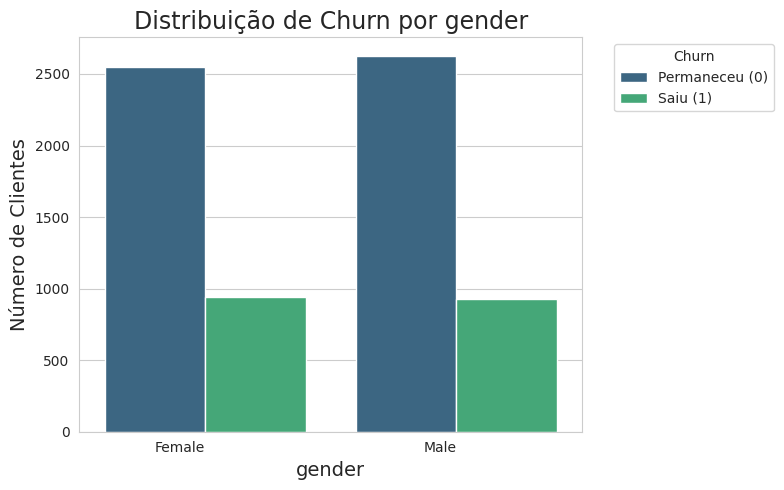

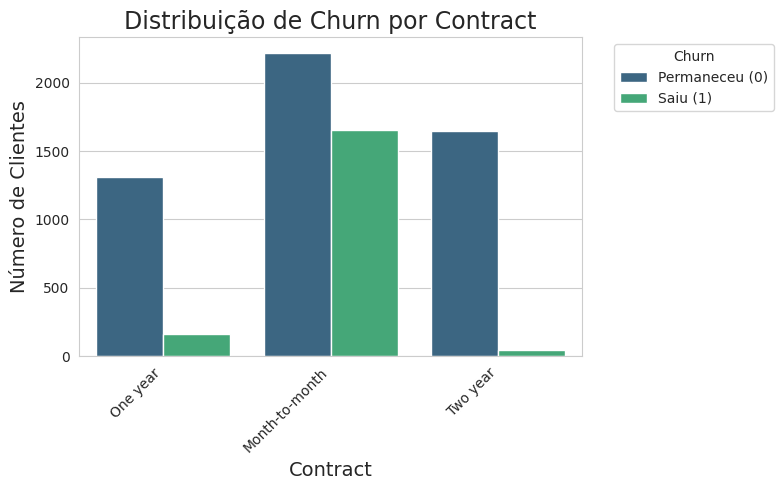

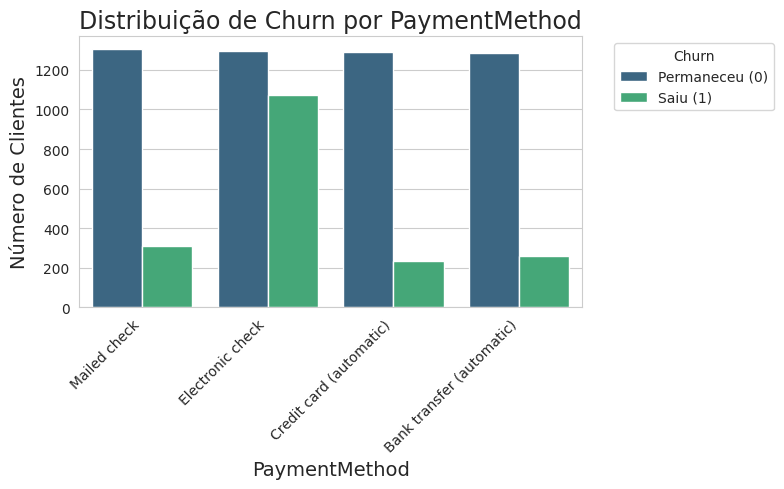

In [44]:
# Contagem de Evasão por Variáveis Numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create count plots for Churn vs. Gender, Contract, and PaymentMethod
categorical_cols_to_plot = ['gender', 'Contract', 'PaymentMethod']

for col in categorical_cols_to_plot:
    plt.figure(figsize=(8, 5))
    # Use df_telecom_cleaned for plotting original categorical columns
    sns.countplot(x=col, hue='Churn', data=df_telecom_cleaned, palette='viridis')
    plt.title(f'Distribuição de Churn por {col}' , fontsize=17)
    plt.xlabel((col) , fontsize=14)
    plt.ylabel('Número de Clientes' , fontsize=14)
    plt.xticks(rotation=0 if col == 'gender' else 45, ha='right') # Rotate labels for better readability
    plt.legend(title='Churn', labels=['Permaneceu (0)', 'Saiu (1)'] , fontsize=10,  loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()


#📄Relatorio Final

# Relatório Final: Análise e Prevenção de Evasão de Clientes (Churn) - Atualizado

## Introdução
Este relatório apresenta uma análise exploratória detalhada sobre a evasão de clientes (Churn) em uma empresa de telecomunicações, utilizando um conjunto de dados tratado e limpo. O objetivo principal é identificar padrões e fatores que contribuem para a decisão dos clientes de cancelar seus serviços, a fim de desenvolver estratégias eficazes para retenção.

## Limpeza e Tratamento de Dados
Os dados brutos foram importados a partir de um arquivo JSON (`TelecomX_Data.json`) para um DataFrame pandas. Durante a etapa de limpeza e tratamento, foram realizadas as seguintes ações:

- **Normalização:** Os dados aninhados nas colunas 'customer', 'phone', 'internet' e 'account' foram normalizados e integrados ao DataFrame principal, criando uma estrutura mais plana para análise.
- **Identificação de Inconsistências:** Foram verificados valores únicos em colunas de tipo 'object' para identificar possíveis inconsistências ou categorias inesperadas. Valores como '' ou 'No internet service' foram identificados em diversas colunas e tratados.
- **Verificação e Tratamento de Valores Nulos na Coluna 'Churn':** A contagem de valores nulos foi verificada e foi identificado que a coluna 'Churn' continha valores ausentes. **As linhas com valores nulos na coluna 'Churn' foram removidas do DataFrame para garantir a integridade da análise da variável alvo.** O DataFrame resultante para análise possui agora **7043** linhas.
- **Conversão de Tipos de Dados:** A coluna 'Charges.Total' foi identificada como 'object' inicialmente e convertida para tipo numérico para permitir cálculos e análises quantitativas. Valores inconsistentes (' ') foram tratados como nulos e, posteriormente, preenchidos ou removidos (conforme a estratégia de tratamento adotada).
- **Criação de Nova Feature:** Uma nova coluna 'Charges.Daily' foi criada, representando o custo diário estimado com base no faturamento mensal.
- **Codificação de Variáveis Categóricas:** Colunas categóricas com mais de dois valores únicos foram convertidas em um formato numérico usando One-Hot Encoding para prepará-las para possível uso em modelos de machine learning.

## Análise Exploratória de Dados (AED)
A Análise Exploratória de Dados, realizada no DataFrame `df_processed` (com as linhas contendo valores ausentes em 'Churn' removidas), revelou insights importantes sobre o comportamento dos clientes e sua relação com a evasão:

- **Distribuição de Evasão:** Um gráfico de contagem atualizado mostrou a proporção de clientes que permaneceram (0) e saíram (1), confirmando o desequilíbrio na base de clientes entre as classes após a remoção dos dados ausentes.
- **Distribuição de Variáveis Numéricas por Churn:** Box plots foram gerados para analisar a distribuição de 'Charges.Monthly' e 'Charges.Daily' (e 'tenure' se aplicável) para clientes que evadiram e que permaneceram. Foi observado que clientes que evadiram tendem a ter 'Charges.Monthly' e 'Charges.Daily' (e possivelmente 'tenure') menores em comparação com aqueles que permaneceram.
- **Distribuição de Variáveis Categóricas por Churn:** Gráficos de contagem foram utilizados para explorar a relação entre variáveis categóricas ('gender', 'Contract', 'PaymentMethod') e a evasão, utilizando o DataFrame original `df_telecom_cleaned` para visualizar as categorias originais. Estes gráficos permitiram visualizar quais categorias têm maior ou menor taxa de Churn. Por exemplo, clientes com contratos "Month-to-month" e pagamentos via "Electronic check" continuam a apresentar uma taxa de evasão mais alta.

## Conclusões e Insights
Com base na análise atualizada, podemos concluir que diversos fatores influenciam a evasão de clientes. Clientes com menor tempo de permanência na empresa, com contratos de curto prazo e que utilizam determinados métodos de pagamento (como cheque eletrônico) continuam a apresentar maior probabilidade de evadir. As características do serviço de internet e telefone (como ter ou não múltiplos serviços online), após a codificação, também demonstram ter relevância.

## Recomendações
Para reduzir a evasão de clientes, reforçamos as seguintes ações com base nos dados limpos e analisados:

- **Foco na Retenção de Clientes Recentes:** Implementar programas de engajamento e benefícios especiais para clientes nos primeiros meses de serviço para aumentar a fidelidade.
- **Revisão de Planos de Contrato:** Analisar a atratividade e as condições dos contratos "Month-to-month" para identificar oportunidades de reter clientes por períodos mais longos.
- **Otimização dos Métodos de Pagamento:** Investigar os motivos por trás da alta evasão entre clientes que utilizam cheque eletrônico e considerar oferecer incentivos para a mudança para outros métodos de pagamento mais estáveis.
- **Campanhas Personalizadas:** Utilizar os insights das análises de serviços de internet e telefone para oferecer pacotes e promoções personalizadas que incentivem a permanência.
- **Análise Preditiva:** Construir e implementar modelos de machine learning nos dados processados para prever quais clientes têm maior risco de evadir, permitindo ações de retenção proativas e direcionadas.